## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('human_body_data/human_body_temperature.csv')

In [3]:
print df.describe()
print "\n --------------------"
print df.head()

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000

 --------------------
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


# 1.  Is the distribution of body temperatures normal? 

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

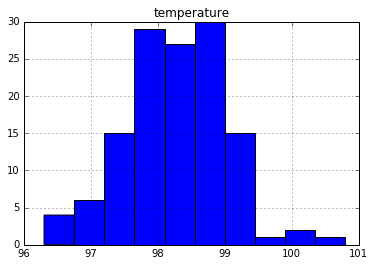

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(column='temperature')

# Null hypothesis indicates distribution of values is normal. A p < 0.05 would suggest that we can reject the H0.

import scipy.stats as stats
stats.normaltest(df.temperature)

# ANS: Temperature values are slightly skewed to the right, but p > 0.05 indicating values are normally distributed.

# 2. Is the true population mean really 98.6 degrees F?

In [5]:
import numpy as np
p_mean = 98.6
s_mean = df['temperature'].mean()
n = len(df)
s_sd = df['temperature'].std()
p_sd = s_sd/np.sqrt(n)

print 'reported population mean, p_mean:', p_mean
print 'sample mean, s_mean:', s_mean
print 'sample size, n:', n
print 'sample standard deviation, s_sd:', s_sd
print 'estimated standard deviation of sampling mean, p_sd:', p_sd
print 'true pop mean: ??' 

reported population mean, p_mean: 98.6
sample mean, s_mean: 98.2492307692
sample size, n: 130
sample standard deviation, s_sd: 0.733183158039
estimated standard deviation of sampling mean, p_sd: 0.0643044168379
true pop mean: ??


In [6]:
# given 98.2 sample mean, what is 99% confidence interval for the pop mean body temp?

# using z table, .9901 is equivelent to sd of 2.33
# finding approx pop mean w : -z < (s_mean - p_mean) / p_sd) < z

a_p_mean1 = ((-2.58 * p_sd) - s_mean) * -1
a_p_mean2 = ((2.58 * p_sd) - s_mean)* -1

print '99% confident that pop body temp  lies between', a_p_mean1, 'and', a_p_mean2

# p value = less than 1% chance that pop mean is 98.6

99% confident that pop body temp  lies between 98.4151361647 and 98.0833253738


In [7]:
# given 98.2 sample mean, what is probability of getting sample mean of 98.25?

z = (s_mean - 98.2)/p_sd 
print p_sd
print 'z value:', z
# 98.25 is 0.76 SD from the mean

p_value = (1 - .7764) # .7764 comes from z table
print 'p value:', p_value # given the null is true, probability of finding a mean of 98.25 is 22.3% or less

0.0643044168379
z value: 0.765589234016
p value: 0.2236


In [8]:
x = df['temperature']
y = df['temperature']
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print p_value

0.0


# 3. At what temperature should we consider someone's temperature to be "abnormal"?

In [9]:
# given a pop mean of 98.2∘F what is the 95% confidence interval that a temperature is outside
# the expected pop mean?

# aka at what temp is a random person's temp (from the population) considered to be abnormal? 

# Need to figure out what the SD of sampling distribution is and figure out with what confidence we can say 
# a temperature range would be outside of that distribution

p_mean = 98.2
s_mean = df['temperature'].mean()
n = len(df)
s_sd = df['temperature'].std()
p_sd = s_sd/np.sqrt(n)


s_sd_s_mean = (s_mean - p_mean)/p_sd
print "sample sd of the sample mean, s_sd_s_mean: ", s_sd_s_mean

# 95% CI = .95/2 = .475
# .475 + .50 (other half of gaussian bell curve) = .975 
# .975 is equivalent to a z of 1.96 i.e. at 95% confidence z stat is 1.96

z_stat = 1.96
p_sd = (z_stat*s_sd_s_mean) # looked this up in Z table

print "population sd, p_sd: ", p_sd

# 95% confident that a random sample will be w/ in 1.96 SD of the Pop mean...
above = 98.2 + 1.96
below = 98.2 - 1.96

print 'ANS: 95% confident any temp ABOVE', above, 'or', 'BELOW', below, 'would be abnormal given a pop mean of 98.2∘F'

sample sd of the sample mean, s_sd_s_mean:  0.765589234016
population sd, p_sd:  1.50055489867
ANS: 95% confident any temp ABOVE 100.16 or BELOW 96.24 would be abnormal given a pop mean of 98.2∘F


# 4. Is there a significant difference between males and females in normal temperature?

In [10]:
print df.head()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [11]:
df.groupby('gender').mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [12]:
df.groupby('gender').std()

,temperature,heart_rate
gender,,
F,0.743488,8.105227
M,0.698756,5.875184


In [13]:
from scipy.stats import ttest_ind
# null hypothesis that 2 independent samples have identical average (expected) values
# if p < 0.05, reject the null

cat1 = df.temperature[(df['gender'] == 'F')]
cat2 = df.temperature[(df['gender'] == 'M')]

print ttest_ind(cat1, cat2)

print 'ANS: p > 0.05, indicating female and male populations have different average body temps.'

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)
ANS: p > 0.05, indicating female and male populations have different average body temps.


In [31]:
f_m = f_s_mean - m_s_mean
f_s_mean = df.temperature[(df['gender'] == 'F')].mean()
m_s_mean = df.temperature[(df['gender'] == 'M')].mean()
f_s_sd = df.temperature[(df['gender'] == 'F')].std()
m_s_sd = df.temperature[(df['gender'] == 'M')].std()
m_n = df.temperature[(df['gender'] == 'M')].count()
f_n = df.temperature[(df['gender'] == 'F')].count()

f_p_sd = (f_s_sd**2/f_n)
m_p_sd = (m_s_sd**2/m_n)
pop_sd_f_m = np.sqrt(f_p_sd + m_p_sd)

# H0: no difference between F and M mean body temp, H1: difference between F and M mean temp.
print 'mean difference:', f_m
z = (f_m - 0)/pop_sd_f_m # z = 2.29 which translates into critical value of .9890
p = 1 - .9890
print 'p value:', p

print 'ANS: given H0: 0, probability of getting a mean diff of', f_m, 'is', p*100, '%', 'We can therefore reject the H0'

mean difference: 0.289230769231
p value: 0.011
ANS: given H0: 0, probability of getting a mean diff of 0.289230769231 is 1.1 % We can therefore reject the H0


In [33]:
from scipy import stats
import numpy as np
f = df.temperature[(df['gender'] == 'F')]
fmean, fsigma = np.mean(f), f_s_sd/ np.sqrt(len(f))
conf_int = stats.norm.interval(0.95, loc=fmean, scale=fsigma)
print conf_int

(98.213101595213345, 98.574590712478937)


In [34]:
from scipy import stats
import numpy as np
m = df.temperature[(df['gender'] == 'M')]
m_mean, m_sigma = np.mean(m), m_s_sd/ np.sqrt(len(m))
conf_int = stats.norm.interval(0.95, loc=m_mean, scale=m_sigma)
print conf_int

(97.934745334449957, 98.274485434780786)


In [35]:
from scipy import stats
import numpy as np
a = df.temperature
mean, sigma = np.mean(a), np.std(a)/ np.sqrt(len(a))
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
print a.mean()
print a.std()
print conf_int

98.2492307692
0.733183158039
(98.123682111456617, 98.374779427004881)


In [22]:
f_m/(f_s_sd/np.sqrt(f_n))

3.1363704401458468